In [3]:
# Load the QISKIT library
from qiskit import *

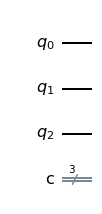

In [45]:
# Creating a circuit with 3 classical and three quantum registers
qregisters =3
qclassical =3
circuit= QuantumCircuit(qregisters,qclassical)
circuit.draw()

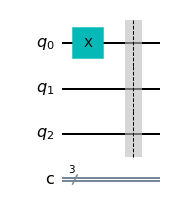

In [46]:
# Adding NOT gate and a barrier
circuit.x(0)
circuit.barrier()
circuit.draw()

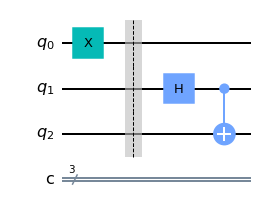

In [47]:
# Create Entanglement using Hadamard and CNOT gate
circuit.h(1)
circuit.cx(1,2)
circuit.draw()

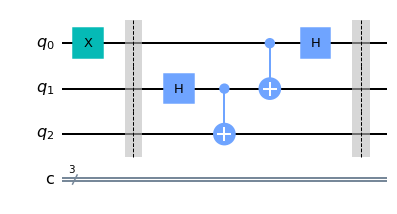

In [48]:
# Add CNOT and Hadamard between q0 and q1 to 
#complete the teleportation protocol
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.draw()

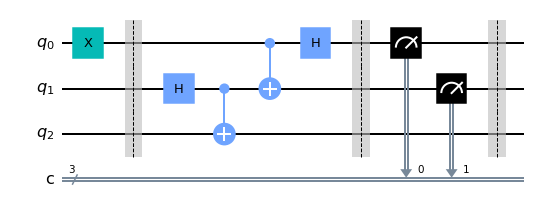

In [49]:
# Measure the qubits 0 and 1 and store in classical register 0 and 1
circuit.measure([0,1],[0,1])
circuit.barrier()
circuit.draw()

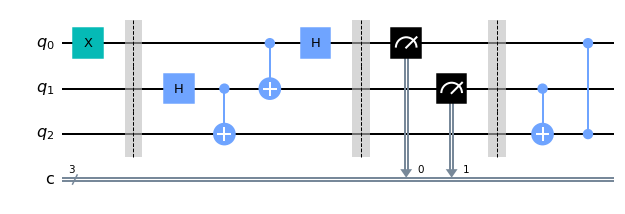

In [50]:
# Verifying the teleported Quantum Information
# To dod this we add a CNOT gate between qubit 1,2 and Z gate between 0(alice),2(bob)
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw()

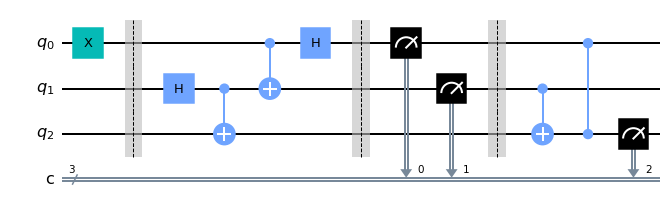

In [51]:
# Measure the (Bob) qubit 2
circuit.measure(2,2)
circuit.draw()

{'111': 258, '100': 254, '101': 271, '110': 241}


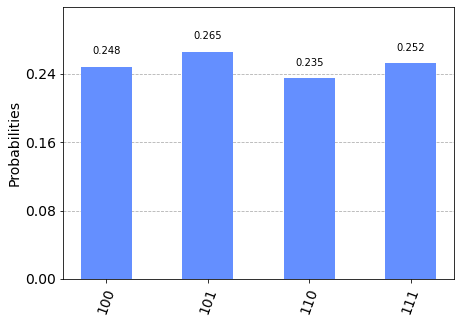

In [52]:
# Use aer simulation
from qiskit.tools.visualization import plot_histogram
# Aer simulation
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Job Status: job has successfully run
{'111': 249, '110': 263, '101': 265, '100': 247}


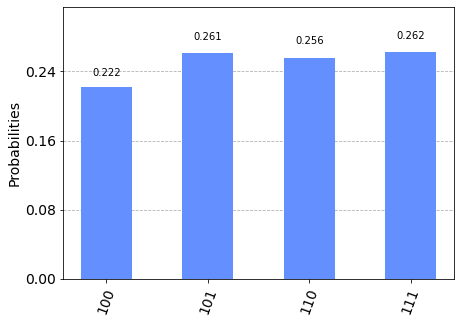

In [13]:
from qiskit.tools.monitor import job_monitor
# load IBM Quantum Account
IBMQ.load_account()
ackend('ibmq_16_melbourne’)
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_qasm_simulator')
# Submit and Monitor the circiut
job = execute(circuit, backend = qcomp, shots = 1024)
job_monitor(job)
result = job.result()
print(counts)
plot_histogram(result.get_counts(circuit))